# MNIST Nueral Network Implementation

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./mnist-nn/dataset/mnist_train.csv')

In [15]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [17]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), 0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i+1)%10 == 0 :
            print("iteration: " + str(i+1))
            prediction = get_predictions(A2)
            print(get_accuracy(prediction, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 500, 0.10)

iteration: 10
[3 5 5 ... 4 6 6] [3 3 9 ... 7 6 6]
0.21210169491525424
iteration: 20
[1 5 6 ... 4 6 6] [3 3 9 ... 7 6 6]
0.3079322033898305
iteration: 30
[1 5 6 ... 4 6 6] [3 3 9 ... 7 6 6]
0.3865084745762712
iteration: 40
[1 5 9 ... 4 6 6] [3 3 9 ... 7 6 6]
0.4414915254237288
iteration: 50
[1 5 9 ... 4 6 6] [3 3 9 ... 7 6 6]
0.4845762711864407
iteration: 60
[1 5 9 ... 2 6 6] [3 3 9 ... 7 6 6]
0.5184915254237288
iteration: 70
[1 5 9 ... 2 6 6] [3 3 9 ... 7 6 6]
0.5502542372881356
iteration: 80
[1 5 9 ... 2 6 6] [3 3 9 ... 7 6 6]
0.5793389830508474
iteration: 90
[3 5 9 ... 2 6 6] [3 3 9 ... 7 6 6]
0.6051186440677966
iteration: 100
[3 5 9 ... 2 6 6] [3 3 9 ... 7 6 6]
0.6277457627118644
iteration: 110
[3 5 4 ... 2 6 6] [3 3 9 ... 7 6 6]
0.6479830508474577
iteration: 120
[3 5 4 ... 2 6 6] [3 3 9 ... 7 6 6]
0.667
iteration: 130
[3 5 4 ... 7 6 6] [3 3 9 ... 7 6 6]
0.6828135593220339
iteration: 140
[3 5 4 ... 7 6 6] [3 3 9 ... 7 6 6]
0.6975762711864407
iteration: 150
[3 5 4 ... 7 6 6] [3 3 9 .

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


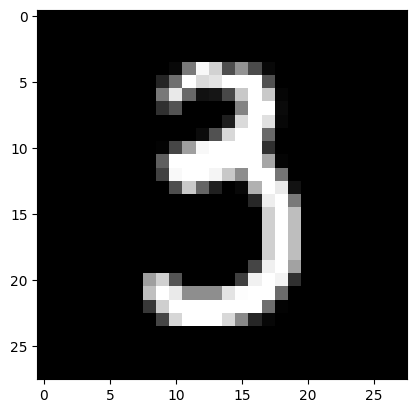

Prediction:  [5]
Label:  3


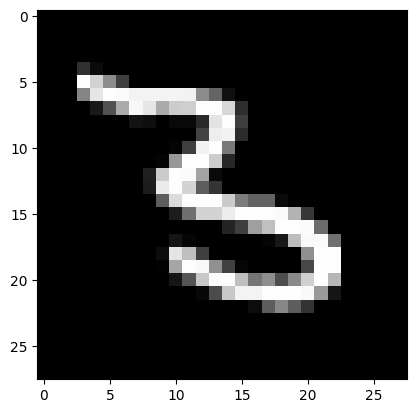

Prediction:  [9]
Label:  9


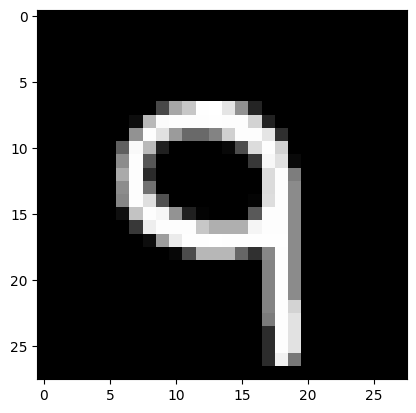

Prediction:  [8]
Label:  8


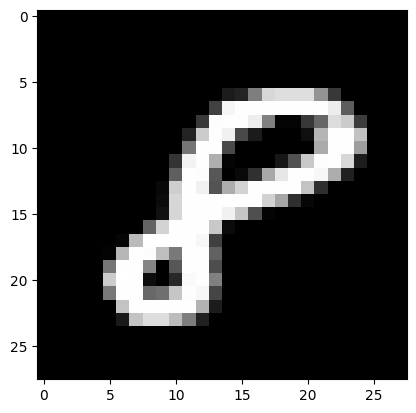

Prediction:  [2]
Label:  2


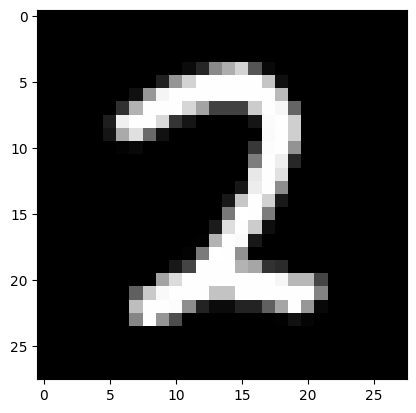

In [23]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)

In [24]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 9 2 9 1 0 6 0 6 4 4 2 5 2 0 1 7 6 6 3 6 7 6 2 9 7 9 7 3 9 4 6 0 9 2 9 4
 1 3 4 3 0 3 8 5 6 9 9 5 5 5 9 0 7 5 4 3 7 4 7 0 7 8 7 2 7 8 1 8 4 6 1 1 1
 6 8 6 6 3 4 3 8 8 0 2 5 7 9 8 7 3 1 1 9 7 6 8 0 2 2 1 7 4 1 8 0 3 8 3 3 6
 5 7 8 9 7 9 7 7 1 3 3 5 2 1 0 2 1 4 1 9 8 4 9 7 8 3 7 7 1 3 6 9 5 7 5 9 4
 1 9 0 2 1 2 1 1 5 5 6 6 2 1 6 1 3 1 6 9 6 7 8 3 0 6 7 1 9 4 9 4 7 4 8 3 3
 8 5 9 9 0 2 1 2 1 3 9 7 5 3 0 4 4 2 6 9 3 4 9 5 5 6 3 7 3 2 1 6 1 1 4 3 3
 8 5 2 7 6 0 8 6 5 1 3 8 9 2 8 0 1 4 9 3 6 2 6 9 1 3 7 7 6 7 6 8 0 9 2 2 1
 2 9 4 1 0 1 4 9 5 4 7 9 0 2 9 8 2 2 0 3 2 0 4 9 6 8 2 2 0 3 3 8 9 6 1 0 8
 2 7 5 6 3 7 9 8 8 7 7 3 2 0 4 2 2 0 1 4 5 8 5 2 0 8 8 2 0 1 9 9 2 8 7 9 2
 1 1 8 6 2 9 0 0 8 2 9 3 7 7 4 3 3 4 7 1 6 6 8 2 3 0 8 2 8 7 2 9 1 2 1 2 8
 4 3 0 0 6 3 9 7 9 9 1 2 5 1 8 2 9 4 6 1 9 1 3 9 7 2 3 7 6 2 2 9 4 5 8 5 7
 0 6 1 0 7 8 7 7 0 8 9 5 7 5 1 0 2 9 9 3 8 3 2 9 1 9 4 4 7 9 7 9 5 1 9 8 8
 6 8 9 1 4 1 7 1 5 0 8 0 4 0 1 2 6 5 7 8 5 0 9 0 1 7 2 0 1 1 1 4 0 6 6 1 4
 2 1 2 8 2 1 3 9 7 5 1 3 

np.float64(0.832)